Temporal and spatial topography of cell proliferation in cancer: doi: 10.1038/s41556-022-00860-9

In [1]:
import pandas as pd
import os
import warnings

dfs = []
path = 'D:/Projects/DimRed/rawdata/48h' #Synapse.org repository syn22300771 MCF10A numerical dataset
folder = os.listdir(path)
for file in folder:
    df = pd.read_excel(path+'/'+file)
    dfs.append(df)
concatenated_df = pd.concat([df.assign(name=i) for i, df in enumerate(dfs)], ignore_index=True)
warnings.filterwarnings("ignore", category=RuntimeWarning)

Compare Different Dimensionality Reduction Methods


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import phate
import pacmap
from sklearn.preprocessing import StandardScaler

# Define dimension reduction methods
def dim_reduction(features_standardized):
    # 1. PCA
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(features_standardized)

    # 2. UMAP
    umap_model = umap.UMAP(n_neighbors=10, min_dist=1, metric='euclidean', spread=1, n_epochs=500)
    umap_result = umap_model.fit_transform(features_standardized)

    # 3. t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    tsne_result = tsne.fit_transform(features_standardized)

    # 4. PHATE
    phate_operator = phate.PHATE(n_components=2, verbose=False)
    phate_result = phate_operator.fit_transform(features_standardized)

    # 5. PACMAP
    pacmap_model = pacmap.PaCMAP(n_components=2)
    pacmap_result = pacmap_model.fit_transform(features_standardized)
    return pca_result, umap_result, tsne_result, phate_result, pacmap_result

def dim_reduction_plot(df, label_mapping, marker='name', n_samples=10000, xlims=None, ylims=None):
    # Sample a subset of the data
    subdf = df.sample(n=n_samples)

    # Define the groups based on conditions & set colormap
    labels = subdf[marker]
    set1_palette = sns.color_palette("Set1", n_colors=4)
    color_map = {i: set1_palette[i] for i in range(4)}
    colors = labels.map(color_map)

    # Standardize features (set mean to 0)
    features = subdf.drop(marker, axis=1)
    features_standardized = StandardScaler().fit_transform(features)

    pca_result, umap_result, tsne_result, phate_result, pacmap_result = dim_reduction(features_standardized)

    # Get the unique labels from the 'name' column
    unique_labels = subdf[marker].unique()
    legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[label], markersize=10, 
                                label=label_mapping[label]) for label in unique_labels]

    # Plotting
    plt.figure(figsize=(25, 5))

    for i, (result, xlim, ylim) in enumerate(zip([pca_result, umap_result, tsne_result, phate_result, pacmap_result], 
                                                 xlims or [None] * 5, ylims or [None] * 5), start=1):
        plt.subplot(1, 5, i)
        scatter = plt.scatter(result[:, 0], result[:, 1], c=colors)
        plt.title(['PCA', 'UMAP', 't-SNE', 'PHATE', 'PaCMAP'][i - 1])
        plt.legend(handles=legend_labels)
        
        # Set x and y axis bounds if provided
        if xlim is not None:
            plt.xlim(xlim)
        if ylim is not None:
            plt.ylim(ylim)

    plt.show()

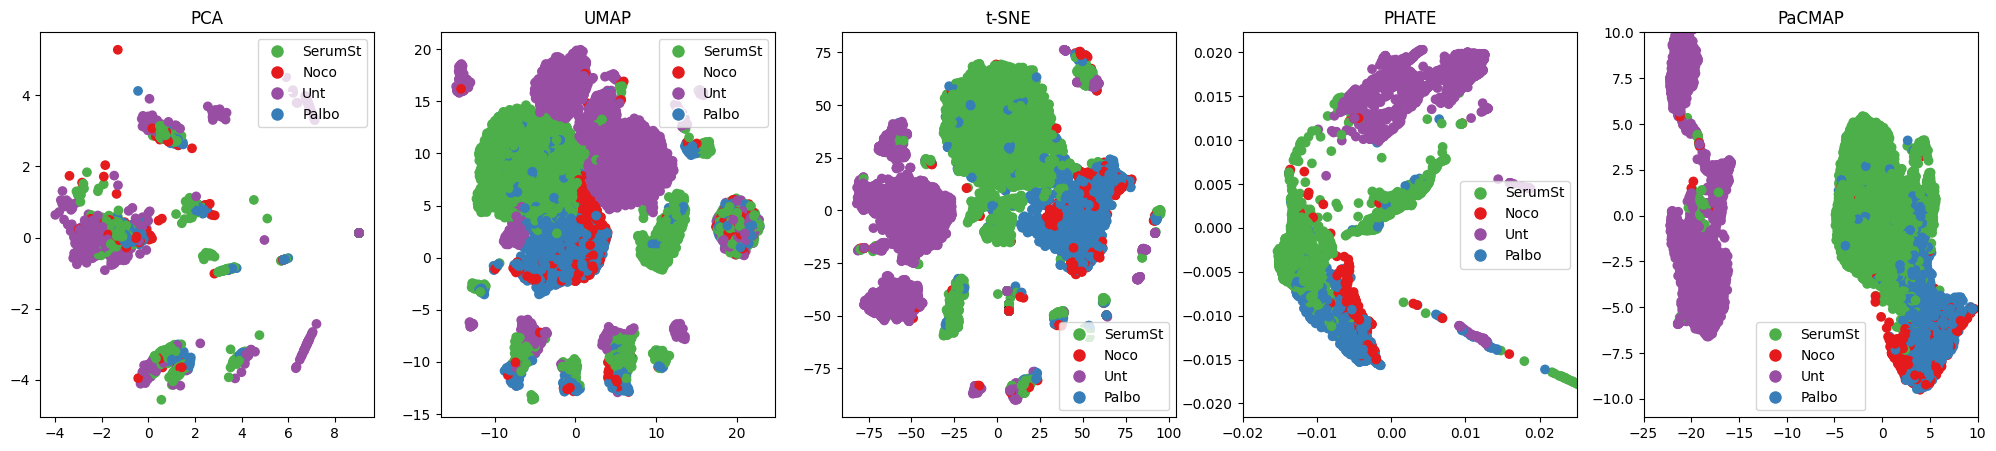

In [3]:
# Dimensionality reduction on 10,000 randomly sampled cells
dim_reduction_plot(
    concatenated_df,
    label_mapping={0: 'Noco', 1: 'Palbo', 2: 'SerumSt', 3: 'Unt'},
    xlims=[None, None, None, (-0.02, 0.025), (-25, 10)],
    ylims=[None, None, None, None, (-11, 10)])

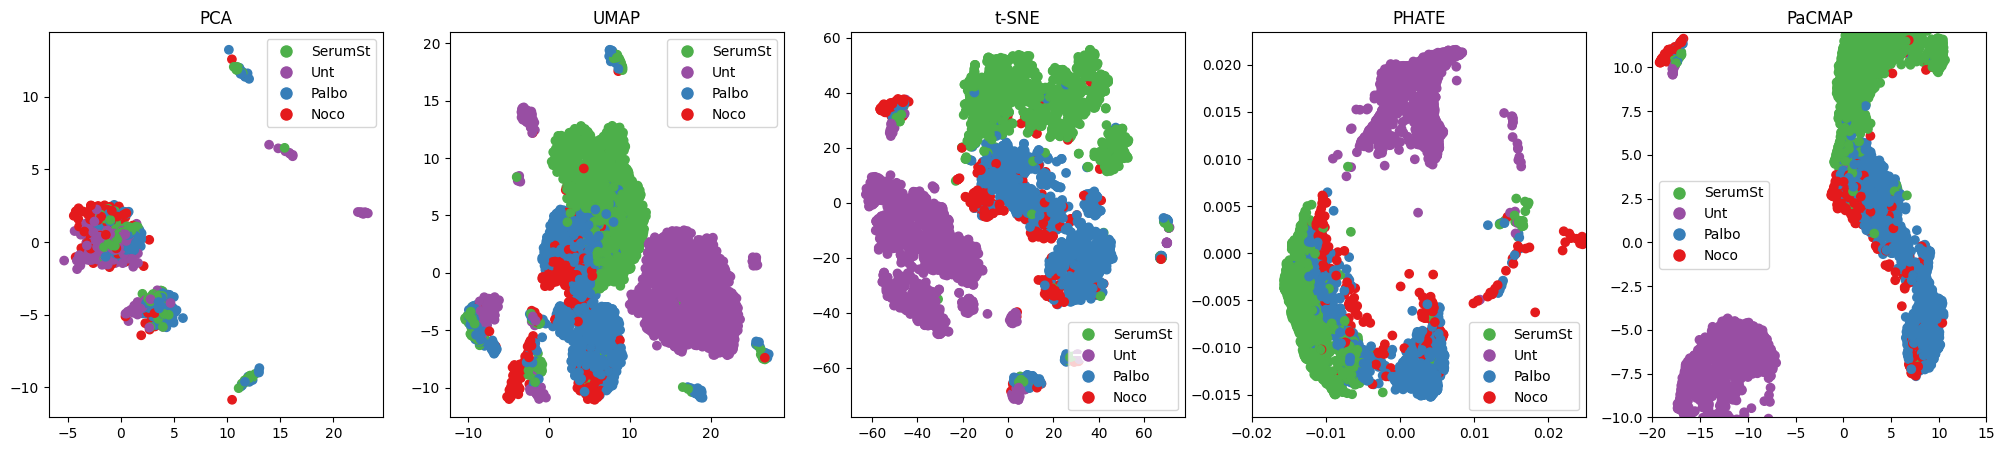

In [4]:
# Dimensionality reduction on 4500 randomly sampled cycling cells (similar proportions per group)
subdf_cycling1 = concatenated_df[(concatenated_df['pRB'] > 0) & (concatenated_df['name'] == 0)].sample(n=343)
subdf_cycling2 = concatenated_df[(concatenated_df['pRB'] > 0) & (concatenated_df['name'] == 1)].sample(n=1318)
subdf_cycling3 = concatenated_df[(concatenated_df['pRB'] > 0) & (concatenated_df['name'] == 2)].sample(n=1500)
subdf_cycling4 = concatenated_df[(concatenated_df['pRB'] > 0) & (concatenated_df['name'] == 3)].sample(n=1500)
subdf_cycling = pd.concat([subdf_cycling1, subdf_cycling2, subdf_cycling3, subdf_cycling4])

dim_reduction_plot(
    subdf_cycling,
    label_mapping={0: 'Noco', 1: 'Palbo', 2: 'SerumSt', 3: 'Unt'},
    n_samples=4500,
    xlims=[None, None, None, (-0.02, 0.025), (-20, 15)],
    ylims=[None, None, None, None, (-10, 12)])

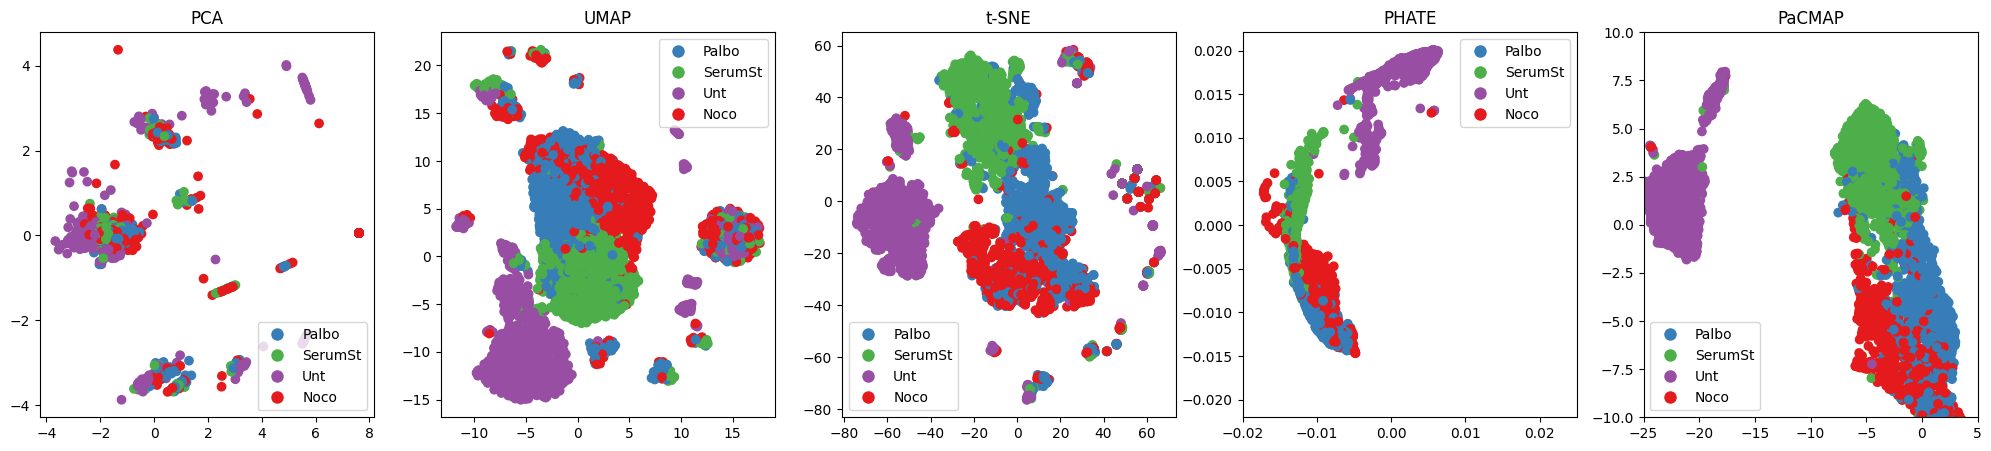

In [5]:
# Dimensionality reduction on 5000 randomly sampled non-cycling cells (same proportions per group)
subdf_noncycling1 = concatenated_df[(concatenated_df['pRB'] <= 0) & (concatenated_df['name'] == 0)].sample(n=2500)
subdf_noncycling2 = concatenated_df[(concatenated_df['pRB'] <= 0) & (concatenated_df['name'] == 1)].sample(n=2500)
subdf_noncycling3 = concatenated_df[(concatenated_df['pRB'] <= 0) & (concatenated_df['name'] == 2)].sample(n=2500)
subdf_noncycling4 = concatenated_df[(concatenated_df['pRB'] <= 0) & (concatenated_df['name'] == 3)].sample(n=2500)
subdf_noncycling = pd.concat([subdf_noncycling1, subdf_noncycling2, subdf_noncycling3, subdf_noncycling4])

dim_reduction_plot(
    subdf_noncycling,
    label_mapping={0: 'Noco', 1: 'Palbo', 2: 'SerumSt', 3: 'Unt'},
    n_samples=5000,
    xlims=[None, None, None, (-0.02, 0.025), (-25, 5)],
    ylims=[None, None, None, None, (-10, 10)])